<a href="https://colab.research.google.com/github/kundana22bce8985/Retinol-fluid-detection-using-segmentation-and-classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


2

In [ ]:
import kagglehub
path = kagglehub.dataset_download("paultimothymooney/kermany2018")
print("✅ Dataset downloaded to:", path)


Using Colab cache for faster access to the 'kermany2018' dataset.
✅ Dataset downloaded to: /kaggle/input/kermany2018


3

In [ ]:
from torchvision import transforms

train_dir = os.path.join(path, "OCT2017/train")
test_dir = os.path.join(path, "OCT2017/test")

# Data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


4

In [ ]:
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# ✅ Correct dataset directories
train_dir = os.path.join(path, "OCT2017/train")
test_dir = os.path.join(path, "OCT2017/test")

print("Train directory:", train_dir)
print("Test directory:", test_dir)


Train directory: /kaggle/input/kermany2018/OCT2017/train
Test directory: /kaggle/input/kermany2018/OCT2017/test


In [ ]:
import os
for item in os.listdir(path):
    print("📁", item)


📁 OCT2017 
📁 oct2017


In [ ]:
import kagglehub, os, glob

# ✅ Download dataset
path = kagglehub.dataset_download("paultimothymooney/kermany2018")
print("✅ Dataset downloaded to:", path)

# ✅ Auto-detect dataset structure safely
train_candidates = glob.glob(os.path.join(path, "**/OCT2017*/train"), recursive=True)
test_candidates  = glob.glob(os.path.join(path, "**/OCT2017*/test"), recursive=True)

if not train_candidates or not test_candidates:
    raise FileNotFoundError("❌ Train/Test directories not found. Please check dataset structure.")

train_dir = train_candidates[0]
test_dir  = test_candidates[0]

print("✅ Train directory exists:", os.path.exists(train_dir))
print("✅ Test directory exists :", os.path.exists(test_dir))
print("📂 Train path:", train_dir)
print("📂 Test path :", test_dir)


Using Colab cache for faster access to the 'kermany2018' dataset.
✅ Dataset downloaded to: /kaggle/input/kermany2018
✅ Train directory exists: True
✅ Test directory exists : True
📂 Train path: /kaggle/input/kermany2018/OCT2017 /train
📂 Test path : /kaggle/input/kermany2018/OCT2017 /test


In [ ]:
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

# ✅ Correct dataset paths
train_dir = "/kaggle/input/kermany2018/OCT2017 /train"
test_dir  = "/kaggle/input/kermany2018/OCT2017 /test"

# Verify paths
print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))

# ✅ Define image transforms
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# ✅ Load datasets
train_data = ImageFolder(train_dir, transform=train_transform)
test_data  = ImageFolder(test_dir,  transform=test_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ Confirm dataset info
print("\n✅ Dataset successfully loaded!")
print("Classes:", train_data.classes)
print("Training samples:", len(train_data))
print("Testing samples:", len(test_data))


Train directory exists: True
Test directory exists: True

✅ Dataset successfully loaded!
Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Training samples: 83484
Testing samples: 968


In [ ]:
import os
print(os.listdir("/kaggle/input/kermany2018/OCT2017 "))


['val', 'test', 'train']


In [ ]:
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

# ✅ Correct dataset paths (keep the space!)
train_dir = "/kaggle/input/kermany2018/OCT2017 /train"
test_dir  = "/kaggle/input/kermany2018/OCT2017 /test"

# Double-check existence
print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))

# ✅ Define image transforms
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# ✅ Load datasets
train_data = ImageFolder(train_dir, transform=train_transform)
test_data  = ImageFolder(test_dir,  transform=test_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

print("\n✅ Dataset successfully loaded!")
print("Classes:", train_data.classes)
print("✅ Training samples:", len(train_data))
print("✅ Testing samples:", len(test_data))


Train directory exists: True
Test directory exists: True

✅ Dataset successfully loaded!
Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
✅ Training samples: 83484
✅ Testing samples: 968


5

In [ ]:
# model = models.resnet18(weights=None)
model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 4)  # 4 classes

model = model.to(device)


6

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


7

In [ ]:
from tqdm import tqdm
import torch
import os

# ✅ Mount Google Drive (only needs to be done once)
from google.colab import drive
drive.mount('/content/drive')

# ✅ Set permanent save path in your Drive
save_dir = "/content/drive/MyDrive/OCT_Model"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "best_model.pth")

num_epochs = 15
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_acc = 0.0  # For saving best model

for epoch in range(num_epochs):
    # ------------------- TRAINING -------------------
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for imgs, labels in progress_bar:
        imgs, labels = imgs.to(device), labels.to(device)

        preds = model(imgs)
        loss = criterion(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # ✅ Accuracy calculation
        _, predicted = torch.max(preds, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    acc = 100 * correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(acc)

    # ------------------- VALIDATION -------------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs)
            loss = criterion(preds, labels)
            val_loss += loss.item()

            _, predicted = torch.max(preds, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_acc = 100 * val_correct / val_total

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # ✅ Save best model (permanent in Drive)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"💾 Best model saved to: {save_path} (Val Acc: {val_acc:.2f}%)")

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"- Train Loss: {avg_loss:.4f}, Train Acc: {acc:.2f}% "
          f"- Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print("\n✅ Training complete!")
print(f"🏆 Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"📁 Final model saved at: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


💾 Best model saved to: /content/drive/MyDrive/OCT_Model/best_model.pth (Val Acc: 99.59%)
Epoch [1/15] - Train Loss: 0.2226, Train Acc: 92.48% - Val Loss: 0.0280, Val Acc: 99.59%


Epoch [2/15] - Train Loss: 0.1822, Train Acc: 93.77% - Val Loss: 0.1505, Val Acc: 94.63%


Epoch [3/15] - Train Loss: 0.1602, Train Acc: 94.48% - Val Loss: 0.0331, Val Acc: 99.38%


Epoch [4/15] - Train Loss: 0.1464, Train Acc: 95.04% - Val Loss: 0.0314, Val Acc: 99.28%


💾 Best model saved to: /content/drive/MyDrive/OCT_Model/best_model.pth (Val Acc: 99.69%)
Epoch [5/15] - Train Loss: 0.1356, Train Acc: 95.32% - Val Loss: 0.0142, Val Acc: 99.69%


Epoch [6/15] - Train Loss: 0.1263, Train Acc: 95.66% - Val Loss: 0.0428, Val Acc: 99.07%


Epoch [7/15] - Train Loss: 0.1227, Train Acc: 95.75% - Val Loss: 0.0484, Val Acc: 98.45%


Epoch [8/15] - Train Loss: 0.1144, Train Acc: 96.10% - Val Loss: 0.0369, Val Acc: 98.97%


💾 Best model saved to: /content/drive/MyDrive/OCT_Model/best_model.pth (Val Acc: 99.90%)
Epoch [9/15] - Train Loss: 0.1088, Train Acc: 96.27% - Val Loss: 0.0134, Val Acc: 99.90%


Epoch [10/15] - Train Loss: 0.1043, Train Acc: 96.44% - Val Loss: 0.0230, Val Acc: 99.48%


Epoch [11/15] - Train Loss: 0.1005, Train Acc: 96.44% - Val Loss: 0.0171, Val Acc: 99.90%


Epoch [12/15] - Train Loss: 0.0942, Train Acc: 96.72% - Val Loss: 0.0465, Val Acc: 98.24%


Epoch [13/15] - Train Loss: 0.0906, Train Acc: 96.87% - Val Loss: 0.0225, Val Acc: 99.59%


Epoch [14/15] - Train Loss: 0.0880, Train Acc: 96.94% - Val Loss: 0.0219, Val Acc: 99.59%


Epoch [15/15] - Train Loss: 0.0825, Train Acc: 97.08% - Val Loss: 0.0213, Val Acc: 99.59%

✅ Training complete!
🏆 Best Validation Accuracy: 99.90%
📁 Final model saved at: /content/drive/MyDrive/OCT_Model/best_model.pth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import torch
import torch.nn as nn
import torchvision.models as models
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# Rebuild same model structure
model = models.resnet18(weights=None)  # same as pretrained=False
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 4)  # CNV, DME, DRUSEN, NORMAL

# Path to saved weights in Google Drive
model_path = "/content/drive/MyDrive/OCT_Model/best_model.pth"

# Check before loading
if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ Model file not found at: {model_path}\nPlease check the path or upload the file.")
else:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    print("✅ Model loaded successfully and ready for classification.")


✅ Using device: cuda
✅ Model loaded successfully and ready for classification.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Using device: cuda
✅ Model loaded successfully and ready for classification.


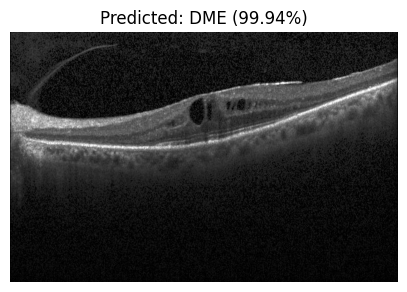

🔍 Predicted class: DME
Confidence: 99.94%


In [ ]:
# --------------------------
# 🔹 Import dependencies
# --------------------------
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# --------------------------
# 🔹 Step 1: Setup device
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# --------------------------
# 🔹 Step 2: Rebuild model
# --------------------------
model = models.resnet18(weights=None)  # same as pretrained=False
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 4)  # CNV, DME, DRUSEN, NORMAL

# --------------------------
# 🔹 Step 3: Load trained weights
# --------------------------
model_path = "/content/drive/MyDrive/OCT_Model/best_model.pth"  # ✅ correct Drive path

if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ Model file not found: {model_path}\nPlease check your Drive path!")
else:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    print("✅ Model loaded successfully and ready for classification.")

# --------------------------
# 🔹 Step 4: Define image transform
# --------------------------
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# --------------------------
# 🔹 Step 5: Load your OCT image from Drive
# --------------------------
# 👇 Replace this path with the actual image you want to test
image_path = "/kaggle/input/kermany2018/OCT2017 /val/DME/DME-9583225-2.jpeg"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"❌ Image file not found: {image_path}")
else:
    img = Image.open(image_path).convert('L')
    img_tensor = transform(img).unsqueeze(0).to(device)

# --------------------------
# 🔹 Step 6: Predict
# --------------------------
with torch.no_grad():
    outputs = model(img_tensor)
    probs = torch.softmax(outputs, dim=1)
    pred_idx = torch.argmax(probs, dim=1).item()

# --------------------------
# 🔹 Step 7: Show result
# --------------------------
classes = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
confidence = probs[0][pred_idx].cpu().item() * 100

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {classes[pred_idx]} ({confidence:.2f}%)", fontsize=12)
plt.axis('off')
plt.show()

print(f"🔍 Predicted class: {classes[pred_idx]}")
print(f"Confidence: {confidence:.2f}%")


upload and predict

8

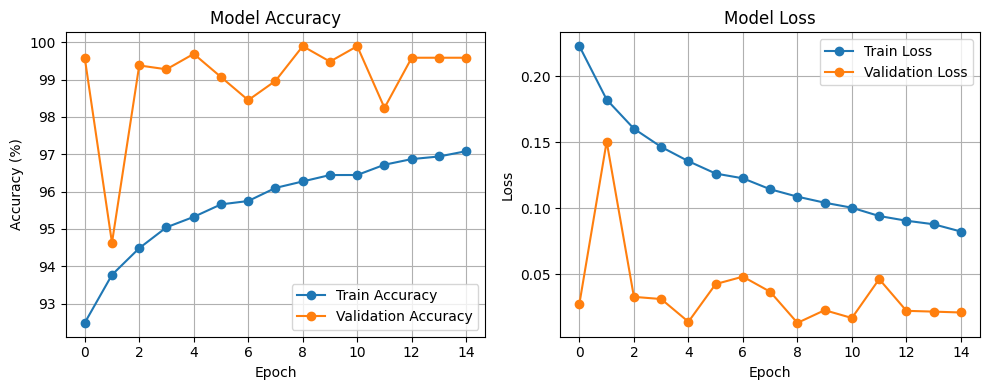

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



📊 Classification Report:
              precision    recall  f1-score   support

         CNV       1.00      1.00      1.00       242
         DME       1.00      1.00      1.00       242
      DRUSEN       1.00      1.00      1.00       242
      NORMAL       1.00      1.00      1.00       242

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968



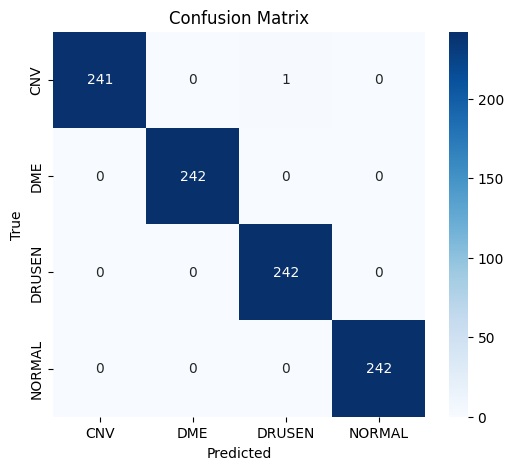

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        preds = model(imgs)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(torch.argmax(preds, dim=1).cpu().numpy())

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_data.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


9

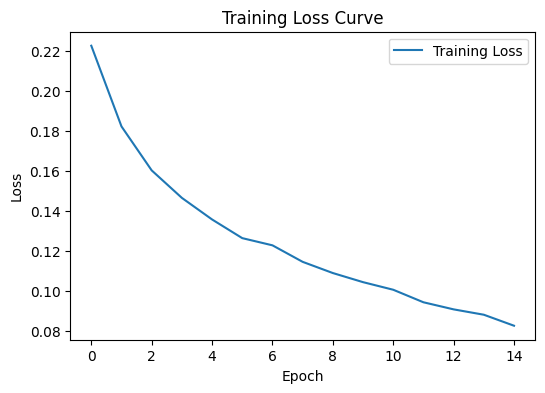

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


10

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/OCT_Model/best_model.pth", map_location=device))
model.eval()


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# #
# # Build the same model as before
# model = models.resnet18(pretrained=False)
# model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
# model.fc = nn.Linear(model.fc.in_features, 4)

# # Load your trained weights
# model.load_state_dict(torch.load("best_model.pth", map_location=device))
# model = model.to(device)
# model.eval()

# print("✅ Trained model loaded successfully — ready for testing!")
